### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 2

**Student Name:**    `Jiawei Luo`

**Student ID:**     `1114028`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 2. Classification on the CIFAR-10 subset

In this problem, you will conduct classification on a subset of the CIFAR10 dataset. The dataset is generated in the following coding block (Please don't modify the following coding block).

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage 


(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images_sub=np.zeros([250,32,32,3])
train_labels_sub=np.zeros([250,1])

test_images_sub=np.zeros([200,32,32,3])
test_labels_sub=np.zeros([200,1])

for clsi in range (10):
    idx=train_labels==clsi
    idx=np.squeeze(idx)
    imgs = train_images[idx,:,:,:]
    imgs = imgs[::200,:,:,:]
    train_images_sub[25*clsi:(clsi+1)*25,:,:,:] = imgs
    train_labels_sub[25*clsi:(clsi+1)*25,:] = clsi
    
    idx=test_labels==clsi
    idx=np.squeeze(idx)
    imgs = test_images[idx,:,:,:]
    imgs = imgs[::50,:,:,:]
    test_images_sub[20*clsi:(clsi+1)*20,:,:,:]=imgs
    test_labels_sub[20*clsi:(clsi+1)*20,:] = clsi
    

print("train_images shape:", train_images_sub.shape)
print("train_labels shape:", train_labels_sub.shape)
print("test_images shape:", test_images_sub.shape)
print("test_labels shape:", test_labels_sub.shape)



train_images shape: (250, 32, 32, 3)
train_labels shape: (250, 1)
test_images shape: (200, 32, 32, 3)
test_labels shape: (200, 1)


1. Implement  the  CNN  shown  in  Q1  in  the  assignment specificication  and  use  it  to classify the provided dataset.  Plot the training accuracy and testing accuracy under different epochs. Please see the assignment specificication for more details of the training settings.

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Input, concatenate, Conv2D 
from keras.layers import Flatten,MaxPooling2D
from keras.models import Model

# inception module for module 1 and module 2
def inception_module(x,NF_Left, NF_Middle_1, NF_Middle_2, NF_right_2 ,name = None):
    coV_left = Conv2D(NF_Left, (1, 1), padding='same', activation='relu', name = name+'_left')(x)
    
    coV_middle_1 = Conv2D(NF_Middle_1, (1, 1), padding='same', activation='relu', name = name+'_middle_1')(x)
    coV_middle_2 = Conv2D(NF_Middle_2, (3, 3), padding='same', activation='relu', name = name+'_middle_2')(coV_middle_1)
    
    coV_right_1 = MaxPooling2D((3, 3), strides=(1, 1), padding='same', name = name+'_right_1')(x)
    coV_right_2 = Conv2D(NF_right_2, (1, 1), padding='same', activation='relu', name = name+'_right_2')(coV_right_1)
    
    output = concatenate([coV_left, coV_middle_2, coV_right_2], axis=3, name=name)
    
    return output

# construct model, input layer
input_layer = Input(shape = (32,32,3), name = 'input_layer')

x = Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu',padding="valid",strides=(1, 1), name = 'conv_1')(input_layer)
x = inception_module(x,NF_Left = 32, NF_Middle_1 = 32, NF_Middle_2 = 64, NF_right_2 = 32,name = 'module_1')
x = inception_module(x,NF_Left = 64, NF_Middle_1 = 64, NF_Middle_2 = 128, NF_right_2 = 64,name = 'module_2')
x = MaxPooling2D( pool_size=(2, 2), strides=(2, 2), padding="same")(x)
x = Flatten()(x)
x = Dense(256,activation = 'relu')(x)
x = Dense(10,activation='softmax')(x)
model = Model(input_layer,x)
model.summary()




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 28, 28, 32)   2432        input_layer[0][0]                
__________________________________________________________________________________________________
module_1_middle_1 (Conv2D)      (None, 28, 28, 32)   1056        conv_1[0][0]                     
__________________________________________________________________________________________________
module_1_right_1 (MaxPooling2D) (None, 28, 28, 32)   0           conv_1[0][0]                     
______________________________________________________________________________________________

In [3]:
# compile and train model
epochs = 20
batch_size = 32
learning_rate = 0.001

model.compile(optimizer = keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
history = model.fit(x=train_images_sub,
                    y=train_labels_sub,
                    validation_data=(test_images_sub, test_labels_sub),
                    epochs=epochs, 
                    batch_size=batch_size)


Epoch 1/20
8/8 [==============================] - 4s 92ms/step - loss: 380.4079 - accuracy: 0.0920 - val_loss: 152.8329 - val_accuracy: 0.1000
Epoch 2/20
8/8 [==============================] - 0s 21ms/step - loss: 58.8328 - accuracy: 0.1680 - val_loss: 10.3921 - val_accuracy: 0.1250
Epoch 3/20
8/8 [==============================] - 0s 22ms/step - loss: 5.5626 - accuracy: 0.1880 - val_loss: 3.4421 - val_accuracy: 0.1650
Epoch 4/20
8/8 [==============================] - 0s 22ms/step - loss: 2.3542 - accuracy: 0.3160 - val_loss: 2.3836 - val_accuracy: 0.1500
Epoch 5/20
8/8 [==============================] - 0s 26ms/step - loss: 1.6842 - accuracy: 0.5080 - val_loss: 2.2027 - val_accuracy: 0.2350
Epoch 6/20
8/8 [==============================] - 0s 26ms/step - loss: 1.3081 - accuracy: 0.6760 - val_loss: 2.1596 - val_accuracy: 0.2300
Epoch 7/20
8/8 [==============================] - 0s 23ms/step - loss: 0.8173 - accuracy: 0.8320 - val_loss: 2.2046 - val_accuracy: 0.2350
Epoch 8/20
8/8 [=====

In [4]:
model.evaluate(test_images_sub,test_labels_sub)

7/7 [==============================] - 0s 6ms/step - loss: 3.5570 - accuracy: 0.3050


[3.557023048400879, 0.3050000071525574]

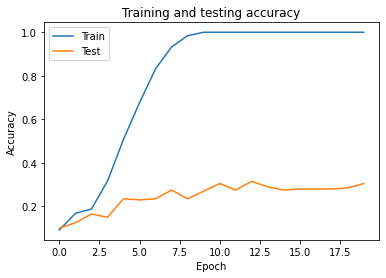

In [5]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and testing accuracy')
plt.legend()
plt.show()

2. Implement the MLP model provided in Q2 in the assignment specificication and use it to classify the given dataset. Plot the training accuracy and testing accuracy under different epochs. Please see the assignment specificication for more details of the training settings.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Input, concatenate, Conv2D 
from keras.layers import Flatten,MaxPooling2D
from keras.models import Model


print("train_images shape:", train_images_sub.shape)
print("train_labels shape:", train_labels_sub.shape)
print("test_images shape:", test_images_sub.shape)
print("test_labels shape:", test_labels_sub.shape)
# MLP model for 2.2
input_layer_mlp = Input(shape = (32,32,3), name = 'input_layer')
x_mlp = Flatten()(input_layer_mlp)
x_mlp = Dense(256,activation = 'relu')(x_mlp)
x_mlp = Dense(10,activation='softmax')(x_mlp)
model_mlp = Model(input_layer_mlp,x_mlp)
model_mlp.summary()

epochs = 20
batch_size = 32
learning_rate = 0.001
# train model using raw image imput
model_mlp.compile(optimizer = keras.optimizers.Adam(lr=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                  metrics=['accuracy'])
history_mlp = model_mlp.fit(x=train_images_sub,
                            y=train_labels_sub,
                            validation_data=(test_images_sub, test_labels_sub),
                            epochs=epochs, 
                            batch_size=batch_size)
print(model_mlp.evaluate(test_images_sub,test_labels_sub))


train_images shape: (250, 32, 32, 3)
train_labels shape: (250, 1)
test_images shape: (200, 32, 32, 3)
test_labels shape: (200, 1)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


D:\Softwares\anaconda\envs\py38\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 1s 24ms/step - loss: 973.7509 - accuracy: 0.0960 - val_loss: 1335.1936 - val_accuracy: 0.1250
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 936.6964 - accuracy: 0.1160 - val_loss: 606.7596 - val_accuracy: 0.1200
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 425.8270 - accuracy: 0.1040 - val_loss: 138.5484 - val_accuracy: 0.1600
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 101.0880 - accuracy: 0.1920 - val_loss: 88.1610 - val_accuracy: 0.0950
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 66.4750 - accuracy: 0.1920 - val_loss: 61.7317 - val_accuracy: 0.1250
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 51.5513 - accuracy: 0.1680 - val_loss: 37.3151 - val_accuracy: 0.1300
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 32.4917 - accuracy: 0.1600 - val_loss: 35.4728 - val_accuracy: 0.1300
Epoch 8/20
8/8 [======

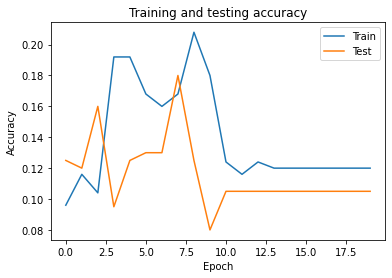

In [7]:
plt.figure(figsize=(6,4))
plt.plot(history_mlp.history['accuracy'], label='Train')
plt.plot(history_mlp.history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and testing accuracy')
plt.legend()
plt.show()

3. To improve the performance of the above MLP, one strategy is to use features of the images as the input of the MLP to improve the performance.  How will you extract the features from the raw images?  Implement the feature extraction and classification on the given dataset, and plot the training accuracy and testing accuracy under different epochs. Please see the assignment specificication for more details of the training settings.

In [8]:
# use a pre trained network for feature extract, reference from workshop 6
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# load Vgg19 model from keras
vgg_model = VGG19(weights='imagenet', input_shape=[32,32,3],include_top=False) 
vgg_model.summary()



Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2, 2, 512)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 527,114
Trainable params: 527,114
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 0s 22ms/step - loss: 1520.0341 - accuracy: 0.1840 - val_loss: 893.9468 - val_accuracy: 0.2600
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 540.4927 - accuracy: 0.4600 - val_lo

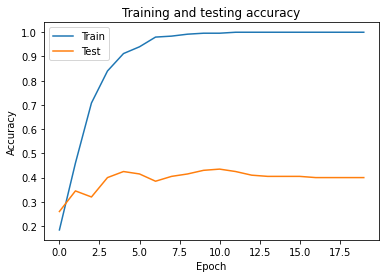

In [9]:
# extract feature using vgg16 and get feature from block4_pool layer
fea_model=tf.keras.Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block4_pool').output)

# extract feature from raw image 
train_fea=fea_model.predict(train_images_sub)
test_fea=fea_model.predict(test_images_sub)

# construct model, using input from extracted feature from Vgg19
inp_fea=layers.Input(shape = (2, 2, 512))
# use MLP for classification from features 
# input_layer_mlp2 = Input(shape = (32,32,3), name = 'input_layer')
x_mlp2 = Flatten()(inp_fea)
x_mlp2 = Dense(256,activation = 'relu')(x_mlp2)
x_mlp2 = Dense(10,activation='softmax')(x_mlp2)

model_mlp2 = Model(inp_fea,x_mlp2)
model_mlp2.summary()
model_mlp2.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])
history_mlp2 = model_mlp2.fit(train_fea,
                                              train_labels_sub, 
                                              validation_data=(test_fea,test_labels_sub),
                                              epochs=20, 
                                              batch_size=32)
plt.plot(history_mlp2.history['accuracy'], label='Train')
plt.plot(history_mlp2.history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and testing accuracy')
plt.legend()
plt.show()


In [10]:
# other attempts, not for questions

cnn_base_model_dropout = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2),padding='same'),
        layers.Dropout(0.2),
   
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2),padding='same'),
        layers.Dropout(0.2),

 
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2),padding='same'),
        layers.Dropout(0.2),
        
        layers.Flatten(name='flatten-layer'),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ], 
)

epochs = 20
batch_size = 32
learning_rate = 0.001

cnn_base_model_dropout.compile(optimizer = keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
dropout_hisotry=cnn_base_model_dropout.fit(train_images,
                           train_labels, 
                           validation_data=(test_images,test_labels),
                           epochs=30, 
                           batch_size=128)
cnn_base_model_dropout.summary()

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 2.0010 - accuracy: 0.2634 - val_loss: 1.6160 - val_accuracy: 0.3934
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 1.4918 - accuracy: 0.4536 - val_loss: 1.3036 - val_accuracy: 0.5236
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.2913 - accuracy: 0.5379 - val_loss: 1.1505 - val_accuracy: 0.5912
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1583 - accuracy: 0.5901 - val_loss: 1.0284 - val_accuracy: 0.6449
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0698 - accuracy: 0.6262 - val_loss: 0.9528 - val_accuracy: 0.6709
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9853 - accuracy: 0.6546 - val_loss: 0.9356 - val_accuracy: 0.6713
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9310 - accuracy: 0.6760 - val_loss: 0.9432 - val_accuracy: 0.6800

(250, 128)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 35,594
Trainable params: 35,594
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 0s 127ms/step - loss: 11.8749 - accuracy: 0.1040 - val_loss: 6.3366 - val_accuracy: 0.1300
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 5.9330 - accuracy: 0.1880 - val_loss: 3.0943 - val_accuracy: 0.3600
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 2.7330 - accuracy: 0.47

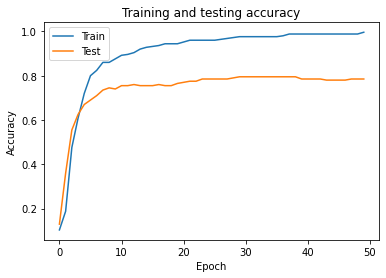

In [11]:
fea_model_dropout=tf.keras.Model(cnn_base_model_dropout.inputs,cnn_base_model_dropout.get_layer('flatten-layer').output)

train_fea_dropout=fea_model_dropout.predict(train_images_sub)
test_fea_dropout=fea_model_dropout.predict(test_images_sub)

print(train_fea_dropout.shape)
inp_fea_dropout=layers.Input((128,))

# input_layer_mlp2 = Input(shape = (32,32,3), name = 'input_layer')
# x_mlp2 = Flatten()(input_layer_mlp2)
x_mlp3 = Dense(256,activation = 'relu')(inp_fea_dropout)
x_mlp3 = Dense(10,activation='softmax')(x_mlp3)

model_mlp3 = Model(inp_fea_dropout,x_mlp3)
model_mlp3.summary()
model_mlp3.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])
history_mlp3 = model_mlp3.fit(train_fea_dropout,
                              train_labels_sub, 
                              validation_data=(test_fea_dropout,test_labels_sub),
                              epochs=50, 
                              batch_size=128)
plt.plot(history_mlp3.history['accuracy'], label='Train')
plt.plot(history_mlp3.history['val_accuracy'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and testing accuracy')
plt.legend()
plt.show()